<a href="https://colab.research.google.com/github/mebenyahia/Python/blob/main/Health_News_Data_Mining_Project_Meryem_Ben_yahia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Health News in Twitter**
###**Practical Application of Data Mining and Knowledge Discovery in R**

Meryem Ben yahia

---
---


## **References:**
**Plotting:**
*   https://r-graph-gallery.com/index.html
*   https://r4ds.had.co.nz/data-visualisation.html


**Text Processing and Data Mining:**
* https://www.sciencedirect.com/science/article/pii/S0306437922000461?casa_token=zxjIHyXzzi8AAAAA:D8x3tJqnokGxtl_wgG3F-5sDzuAbIJE942keK-HxlYwIjL-Jt7ahb_pCmZNLMA5Ctd5M1Tmh#b3
* https://www.datacamp.com/courses/analyzing-social-media-data-in-r


---




# **I. Data Understanding**

## **1. Health News Dataset Overview**

**Dataset Name:**
Health News in Twitter

**Donation Date:**
2/18/2018

**Collection Date:**
2015

**Data Source:**
Twitter API

**Content:**
The dataset comprises health news tweets from over 15 major health news agencies including BBC, CNN, and NYT. Each agency has its own file, named after the agency (e.g., bbchealth.txt for BBC health news), where each line contains tweet information in the format of tweet id, date and time, and tweet content separated by '|'.

**Characteristics:**
- **Text**: The dataset consists of textual data in the form of tweets.
- **Subject Area**: Primarily focused on health news.
- **Associated Tasks**: Suitable for tasks such as clustering and topic modeling.
- **Feature Type**: Real data.
- **Instances**: 58,000 tweets.
- **Features**: 25,000 (approximate number of unique words or features in the dataset).

**Additional Information:**
The dataset has been used to assess the performance of topic modeling algorithms on short text data. However, it can also be utilized for various other tasks such as clustering.

**Missing Values:**
No missing values are present in the dataset.

**Access Link:** [UC Irvine](https://archive.ics.uci.edu/dataset/438/health+news+in+twitter) | [Github](https://github.com/amir-karami/Health-News-Tweets-Data)

----

## **1. Importing and Installing Packages**

In [1]:
options(warn=-1)

In [2]:
install.packages("text2vec")
install.packages("qdapRegex")
install.packages("tm")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("gtExtras")
install.packages("gt")
install.packages("ggridges", dependencies = TRUE)
install.packages("tidytext")
install.packages("wordcloud")
install.packages("reshape2")
install.packages("textmineR")
install.packages("arules")
install.packages("arulesViz")
install.packages("cluster")
install.packages("slackr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘MatrixExtra’, ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘Rcpp’, ‘rsparse’, ‘mlapi’, ‘lgr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘reactR’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘prismatic’, ‘gt’, ‘paletteer’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

al

In [3]:
library(text2vec)
library(qdapRegex)
library(tm)
library(tidytext)
library(wordcloud)
library(dplyr)
library(readr)
library(ggplot2)
library(tidyverse)
library(lubridate)
library(ggridges)
library(Matrix)
library(dplyr)
library(slackr)
library(arules)
library(arulesViz)
library(cluster)
library(textmineR)

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘dplyr’


The following object is masked from ‘package:qdapRegex’:

    explain


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate


The following object is masked from ‘package:qdapRegex’:

    %+%


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()      masks qdapRegex::%+%()
✖ purrr::%||%()       masks base::%||%()
✖ ggplot2::annotate() masks NLP::annotate()
✖ dplyr::explain()    masks qdapRegex::explain()
✖ dplyr::filter()     masks 

## **2. Loading the Dataset from Github**

In [4]:
load_data <- function(url, source_name) {
  data <- read_delim(url, delim = "|", col_names = c("ID", "Date", "Content"), locale = locale(encoding = "latin1"))
  data$Source <- source_name
  data <- data[, c("ID", "Source", "Date", "Content")]
  return(data)
}

In [5]:
kaiser_health   <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/KaiserHealthNews.txt", "Kaiser Health News")

Rows: 3509 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (2): Date, Content
dbl (1): ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(kaiser_health)

ID,Source,Date,Content
<dbl>,<chr>,<chr>,<chr>
5.862667e+17,Kaiser Health News,Thu Apr 09 20:37:18 +0000 2015,Tougher Vaccine Law In Calif. Clears First Hurdle http://khne.ws/1GQdDro http://pbs.twimg.com/media/CCLWazbUEAAmvjH.jpg
5.862602e+17,Kaiser Health News,Thu Apr 09 20:11:29 +0000 2015,A new sort of extracurricular activity: seeing patients. http://khne.ws/1ceRuaZ http://pbs.twimg.com/media/CCLQgiFUIAAC7nJ.jpg
5.862388e+17,Kaiser Health News,Thu Apr 09 18:46:24 +0000 2015,Houston firefighters have another tool at their disposal when answering calls: digital doctors http://khne.ws/1NfQjsp http://pbs.twimg.com/media/CCK9CYoUsAE4PP8.jpg
5.861819e+17,Kaiser Health News,Thu Apr 09 15:00:25 +0000 2015,Will #Montana expand its #Medicaid program? Some moderates there have revived the idea: http://khne.ws/1Do7UrB http://pbs.twimg.com/media/CCKJT7DUAAABcJj.jpg
5.861593e+17,Kaiser Health News,Thu Apr 09 13:30:44 +0000 2015,Rand Paul's campaign first day: abortion and the budget: http://khne.ws/1y8aJwC
5.861591e+17,Kaiser Health News,Thu Apr 09 13:29:47 +0000 2015,"Enroll America, A Group Dedicated To Promoting Health Law Sign Ups, To Cut 100 Jobs http://khne.ws/1HUROpc"


In [7]:
nbc_health      <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/NBChealth.txt", "NBC Health")
bbc_health      <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/bbchealth.txt", "BBC Health")
cbc_health      <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/cbchealth.txt", "CBC Health")
cnn_health      <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/cnnhealth.txt", "CNN Health")
everyday_health <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/everydayhealth.txt", "Everyday Health")
fox_news_health <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/foxnewshealth.txt", "Fox News Health")
gdn_health      <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/gdnhealthcare.txt", "GDN Health")
good_health     <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/latimeshealth.txt", "Good Health")
latimeshealth   <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/latimeshealth.txt", "LA Times Health")
msnhealthnews   <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/msnhealthnews.txt", "MSN Health News")
nprhealth       <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/nprhealth.txt", "NPR Health")
nytimeshealth   <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/nytimeshealth.txt", "NY Times Health")
reuters_health  <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/reuters_health.txt", "Reuters Health")
usnewshealth    <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/usnewshealth.txt", "US News Health")
wsjhealth       <- load_data("https://raw.githubusercontent.com/amir-karami/Health-News-Tweets-Data/master/wsjhealth.txt", "WSJ Health")

Rows: 4215 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (2): Date, Content
dbl (1): ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3929 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (2): Date, Content
dbl (1): ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3741 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (2): Date, Content
dbl (1): ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3808 Columns: 3
── Column specification ──────────────────────────────

# **II. Data Preparation**

## **1. Exploratory Data Analysis**




In [8]:
combined_data <- bind_rows(kaiser_health,
                            nbc_health,
                            bbc_health,
                            cbc_health,
                            cnn_health,
                            everyday_health,
                            fox_news_health,
                            gdn_health,
                            good_health,
                            latimeshealth,
                            msnhealthnews,
                            nprhealth,
                            nytimeshealth,
                            reuters_health,
                            usnewshealth,
                            wsjhealth)

In [9]:
head(combined_data)

ID,Source,Date,Content
<dbl>,<chr>,<chr>,<chr>
5.862667e+17,Kaiser Health News,Thu Apr 09 20:37:18 +0000 2015,Tougher Vaccine Law In Calif. Clears First Hurdle http://khne.ws/1GQdDro http://pbs.twimg.com/media/CCLWazbUEAAmvjH.jpg
5.862602e+17,Kaiser Health News,Thu Apr 09 20:11:29 +0000 2015,A new sort of extracurricular activity: seeing patients. http://khne.ws/1ceRuaZ http://pbs.twimg.com/media/CCLQgiFUIAAC7nJ.jpg
5.862388e+17,Kaiser Health News,Thu Apr 09 18:46:24 +0000 2015,Houston firefighters have another tool at their disposal when answering calls: digital doctors http://khne.ws/1NfQjsp http://pbs.twimg.com/media/CCK9CYoUsAE4PP8.jpg
5.861819e+17,Kaiser Health News,Thu Apr 09 15:00:25 +0000 2015,Will #Montana expand its #Medicaid program? Some moderates there have revived the idea: http://khne.ws/1Do7UrB http://pbs.twimg.com/media/CCKJT7DUAAABcJj.jpg
5.861593e+17,Kaiser Health News,Thu Apr 09 13:30:44 +0000 2015,Rand Paul's campaign first day: abortion and the budget: http://khne.ws/1y8aJwC
5.861591e+17,Kaiser Health News,Thu Apr 09 13:29:47 +0000 2015,"Enroll America, A Group Dedicated To Promoting Health Law Sign Ups, To Cut 100 Jobs http://khne.ws/1HUROpc"


In [10]:
str(combined_data)

tibble [58,243 × 4] (S3: tbl_df/tbl/data.frame)
 $ ID     : num [1:58243] 5.86e+17 5.86e+17 5.86e+17 5.86e+17 5.86e+17 ...
 $ Source : chr [1:58243] "Kaiser Health News" "Kaiser Health News" "Kaiser Health News" "Kaiser Health News" ...
 $ Date   : chr [1:58243] "Thu Apr 09 20:37:18 +0000 2015" "Thu Apr 09 20:11:29 +0000 2015" "Thu Apr 09 18:46:24 +0000 2015" "Thu Apr 09 15:00:25 +0000 2015" ...
 $ Content: chr [1:58243] "Tougher Vaccine Law In Calif. Clears First Hurdle http://khne.ws/1GQdDro http://pbs.twimg.com/media/CCLWazbUEAAmvjH.jpg" "A new sort of extracurricular activity: seeing patients. http://khne.ws/1ceRuaZ http://pbs.twimg.com/media/CCLQgiFUIAAC7nJ.jpg" "Houston firefighters have another tool at their disposal when answering calls: digital doctors http://khne.ws/1"| __truncated__ "Will #Montana expand its #Medicaid program? Some moderates there have revived the idea: http://khne.ws/1Do7UrB "| __truncated__ ...


In [11]:
summary(combined_data)

       ID               Source              Date             Content         
 Min.   :1.061e+17   Length:58243       Length:58243       Length:58243      
 1st Qu.:3.331e+17   Class :character   Class :character   Class :character  
 Median :4.459e+17   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4.214e+17                                                           
 3rd Qu.:5.242e+17                                                           
 Max.   :5.863e+17                                                           

In [12]:
tweets_per_source <- combined_data %>%
  count(Source)

print(tweets_per_source)

# A tibble: 16 × 2
   Source                 n
   <chr>              <int>
 1 BBC Health          3929
 2 CBC Health          3741
 3 CNN Health          3808
 4 Everyday Health     3239
 5 Fox News Health     2000
 6 GDN Health          2990
 7 Good Health         4171
 8 Kaiser Health News  3509
 9 LA Times Health     4171
10 MSN Health News     3199
11 NBC Health          4215
12 NPR Health          4837
13 NY Times Health     5894
14 Reuters Health      4719
15 US News Health       621
16 WSJ Health          3200


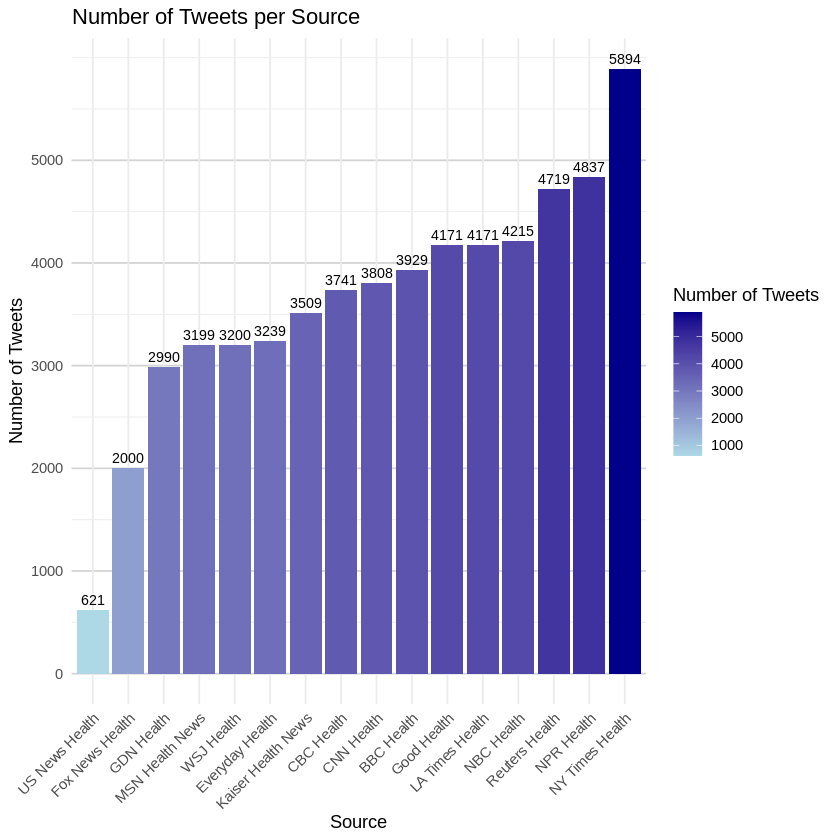

In [13]:
plt <- ggplot(tweets_per_source, aes(x = reorder(Source, n), y = n, fill = n)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  geom_text(aes(label = n), vjust = -0.5, size = 3, position = position_dodge(width = 0.9)) +
  scale_fill_gradient(low = "lightblue", high = "darkblue", name = "Number of Tweets") +
  labs(x = "Source", y = "Number of Tweets", title = "Number of Tweets per Source") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major.y = element_line(color = "lightgrey"),
    legend.position = "right"
  ) +
  scale_y_continuous(breaks = seq(0, max(tweets_per_source$n), by = 1000))

ggsave("tweets_per_source_plot.png", plt, width = 12, height = 8, units = "in")

print(plt)

In [14]:
combined_data$Date <- as.POSIXct(combined_data$Date, format = "%a %b %d %H:%M:%S %z %Y")

combined_data$Year <- lubridate::year(combined_data$Date)

tweets_per_source_per_year <- combined_data %>%
  group_by(Year, Source) %>%
  summarise(Count = n()) %>%
  ungroup() %>%
  arrange(Year, desc(Count))

print(tweets_per_source_per_year)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 44 × 3
    Year Source             Count
   <dbl> <chr>              <int>
 1  2011 MSN Health News     1307
 2  2011 Good Health          104
 3  2011 LA Times Health      104
 4  2012 MSN Health News     1892
 5  2012 Good Health         1203
 6  2012 LA Times Health     1203
 7  2012 CNN Health           650
 8  2012 NPR Health           473
 9  2012 Kaiser Health News   264
10  2013 Everyday Health     3239
# ℹ 34 more rows


In [15]:
summary(tweets_per_source_per_year)

      Year         Source              Count       
 Min.   :2011   Length:44          Min.   :  13.0  
 1st Qu.:2013   Class :character   1st Qu.: 495.5  
 Median :2014   Mode  :character   Median :1212.5  
 Mean   :2014                      Mean   :1323.7  
 3rd Qu.:2014                      3rd Qu.:1908.5  
 Max.   :2015                      Max.   :3776.0  

In [16]:
sources_per_year <- tweets_per_source_per_year %>%
  group_by(Year) %>%
  summarise(Num_Sources = n_distinct(Source))

In [17]:
print(sources_per_year)

# A tibble: 5 × 2
   Year Num_Sources
  <dbl>       <int>
1  2011           3
2  2012           6
3  2013          11
4  2014          14
5  2015          10


In [18]:
summary(sources_per_year)

      Year       Num_Sources  
 Min.   :2011   Min.   : 3.0  
 1st Qu.:2012   1st Qu.: 6.0  
 Median :2013   Median :10.0  
 Mean   :2013   Mean   : 8.8  
 3rd Qu.:2014   3rd Qu.:11.0  
 Max.   :2015   Max.   :14.0  

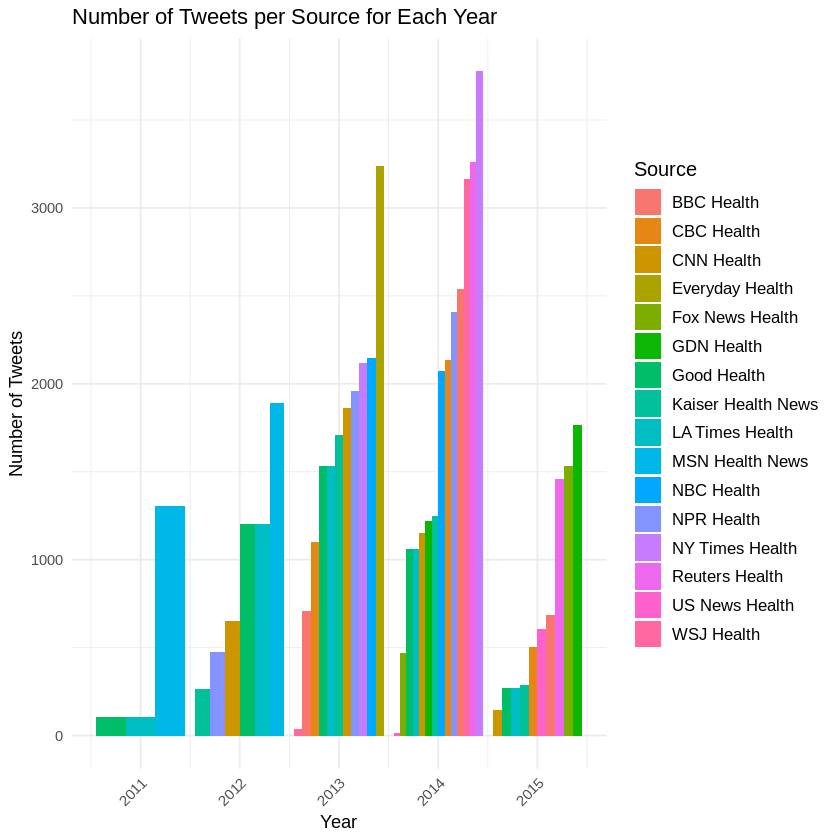

In [19]:
ggplot(tweets_per_source_per_year, aes(x = Year, y = Count, fill = Source, group = reorder(interaction(Source, Year), Count))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Number of Tweets per Source for Each Year",
       x = "Year",
       y = "Number of Tweets",
       fill = "Source") +
  theme_minimal() +
  theme(legend.position = "right",
        axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10))

In [20]:
tweets_per_year <- combined_data %>%
  group_by(Year) %>%
  summarise(
    Sources = list(unique(Source)),
    Source_Count = n_distinct(Source),
    Tweet_Count = n()
  )

print(tweets_per_year)

tweets_per_year <- tweets_per_year %>% mutate(Sources = sapply(Sources, toString))

print(tweets_per_year)

# A tibble: 5 × 4
   Year Sources    Source_Count Tweet_Count
  <dbl> <list>            <int>       <int>
1  2011 <chr [3]>             3        1515
2  2012 <chr [6]>             6        5685
3  2013 <chr [11]>           11       17934
4  2014 <chr [14]>           14       25577
5  2015 <chr [10]>           10        7532
# A tibble: 5 × 4
   Year Sources                                         Source_Count Tweet_Count
  <dbl> <chr>                                                  <int>       <int>
1  2011 Good Health, LA Times Health, MSN Health News              3        1515
2  2012 Kaiser Health News, CNN Health, Good Health, L…            6        5685
3  2013 Kaiser Health News, NBC Health, BBC Health, CB…           11       17934
4  2014 Kaiser Health News, NBC Health, BBC Health, CB…           14       25577
5  2015 Kaiser Health News, BBC Health, CBC Health, CN…           10        7532


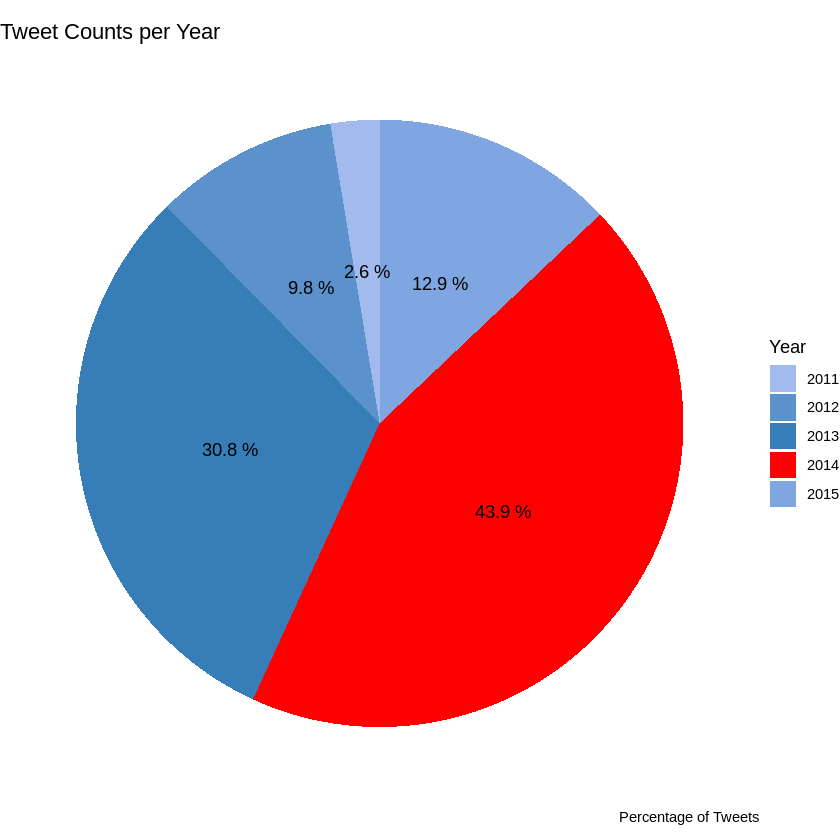

In [21]:
tweets_per_year <- tweets_per_year %>%
  mutate(Percentage = Tweet_Count / sum(Tweet_Count) * 100)

pie_chart <- ggplot(tweets_per_year, aes(x = "", y = Percentage, fill = as.factor(Year))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Tweet Counts per Year", fill = "Year",
       caption = "Percentage of Tweets") +
  theme_void() +
  scale_fill_manual(values = c("2014" = "red",  "2013" = "#377eb8", "2012" = "#5c92cc",
                               "2015" = "#7fa6e0", "2011" = "#a3baee"))+
  geom_text(aes(label = paste(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5))

print(pie_chart)

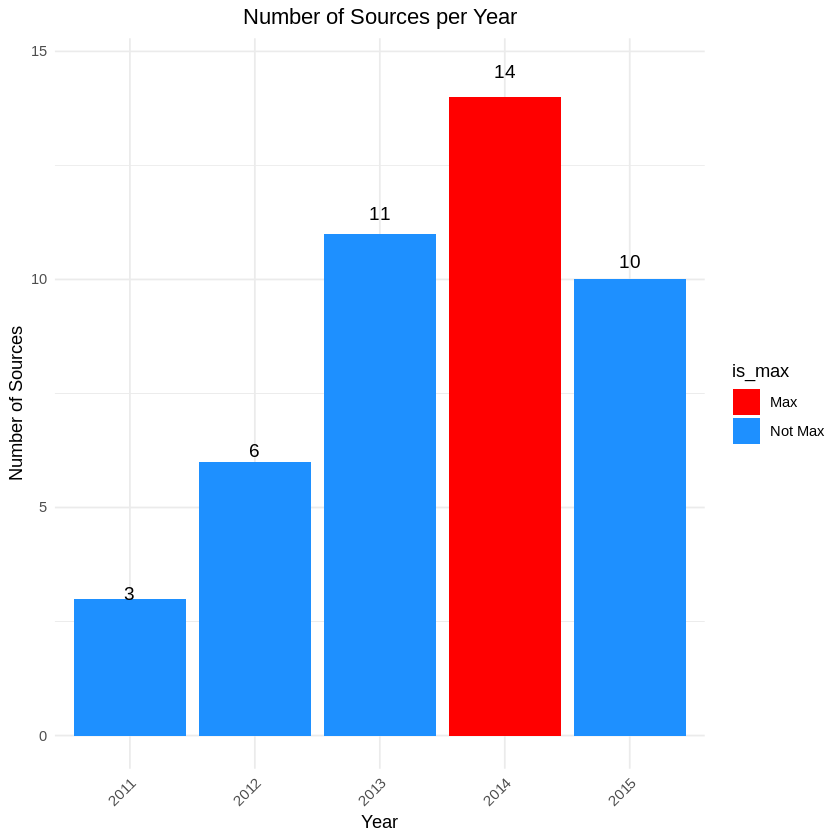

In [22]:
library(ggplot2)
library(dplyr)

tweets_per_year <- tweets_per_year %>%
  mutate(is_max = ifelse(Source_Count == max(Source_Count), "Max", "Not Max"))

ggplot(tweets_per_year, aes(x = as.factor(Year), y = Source_Count, fill = is_max, label = Source_Count))+
  geom_bar(stat = "identity") +
  geom_text(size = 4, position = position_stack(vjust = 1.04)) +
  scale_fill_manual(values = c("Max" = "red", "Not Max" = "dodgerblue")) +
  labs(title = "Number of Sources per Year",
       x = "Year",
       y = "Number of Sources") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1))



In [23]:
data_2014 <- combined_data %>% filter(Year == 2014)

tweets_per_source_2014 <- data_2014 %>%
  group_by(Source) %>%
  summarise(Tweet_Count = n())

print(tweets_per_source_2014)

# A tibble: 14 × 2
   Source             Tweet_Count
   <chr>                    <int>
 1 BBC Health                2537
 2 CBC Health                2137
 3 CNN Health                1151
 4 Fox News Health            468
 5 GDN Health                1222
 6 Good Health               1062
 7 Kaiser Health News        1248
 8 LA Times Health           1062
 9 NBC Health                2071
10 NPR Health                2406
11 NY Times Health           3776
12 Reuters Health            3259
13 US News Health              13
14 WSJ Health                3165


In [24]:
data_2014 <- data_2014 %>%
  filter(!Source %in% c("Fox News Health", "US News Health"))

write.csv(data_2014, "data_2014.csv", row.names = FALSE)

print(data_2014)

# A tibble: 25,096 × 5
        ID Source             Date                Content                   Year
     <dbl> <chr>              <dttm>              <chr>                    <dbl>
 1 5.50e17 Kaiser Health News 2014-12-30 15:35:22 "RT @cspanwj: VIDEO: @j…  2014
 2 5.50e17 Kaiser Health News 2014-12-29 17:09:33 "How A State\u0092s Cho…  2014
 3 5.48e17 Kaiser Health News 2014-12-24 14:52:02 "Some doctors who treat…  2014
 4 5.48e17 Kaiser Health News 2014-12-24 14:49:27 "Ebola Doctor Makes Tou…  2014
 5 5.48e17 Kaiser Health News 2014-12-24 14:48:55 "DETAILS: FDA Proposes …  2014
 6 5.47e17 Kaiser Health News 2014-12-23 20:20:43 "Millions Have Already …  2014
 7 5.47e17 Kaiser Health News 2014-12-23 18:47:31 "Readers Ask: Can I Kee…  2014
 8 5.47e17 Kaiser Health News 2014-12-23 18:38:09 "Some #Medicaid docs ar…  2014
 9 5.47e17 Kaiser Health News 2014-12-22 22:27:35 "Is Your Heart Doctor I…  2014
10 5.46e17 Kaiser Health News 2014-12-19 21:02:58 ".@mandrews110 answers …  2014
# ℹ 2

In [25]:
summary(data_2014)

       ID               Source               Date                       
 Min.   :4.182e+17   Length:25096       Min.   :2014-01-01 00:17:27.00  
 1st Qu.:4.608e+17   Class :character   1st Qu.:2014-04-28 17:49:26.50  
 Median :4.992e+17   Mode  :character   Median :2014-08-12 16:11:14.00  
 Mean   :4.925e+17                      Mean   :2014-07-25 04:44:57.82  
 3rd Qu.:5.249e+17                      3rd Qu.:2014-10-22 12:21:50.25  
 Max.   :5.504e+17                      Max.   :2014-12-31 22:16:26.00  
   Content               Year     
 Length:25096       Min.   :2014  
 Class :character   1st Qu.:2014  
 Mode  :character   Median :2014  
                    Mean   :2014  
                    3rd Qu.:2014  
                    Max.   :2014  

In [26]:
unique_sources_2014 = unique(data_2014$Source)

print(unique_sources_2014)

 [1] "Kaiser Health News" "NBC Health"         "BBC Health"        
 [4] "CBC Health"         "CNN Health"         "GDN Health"        
 [7] "Good Health"        "LA Times Health"    "NPR Health"        
[10] "NY Times Health"    "Reuters Health"     "WSJ Health"        


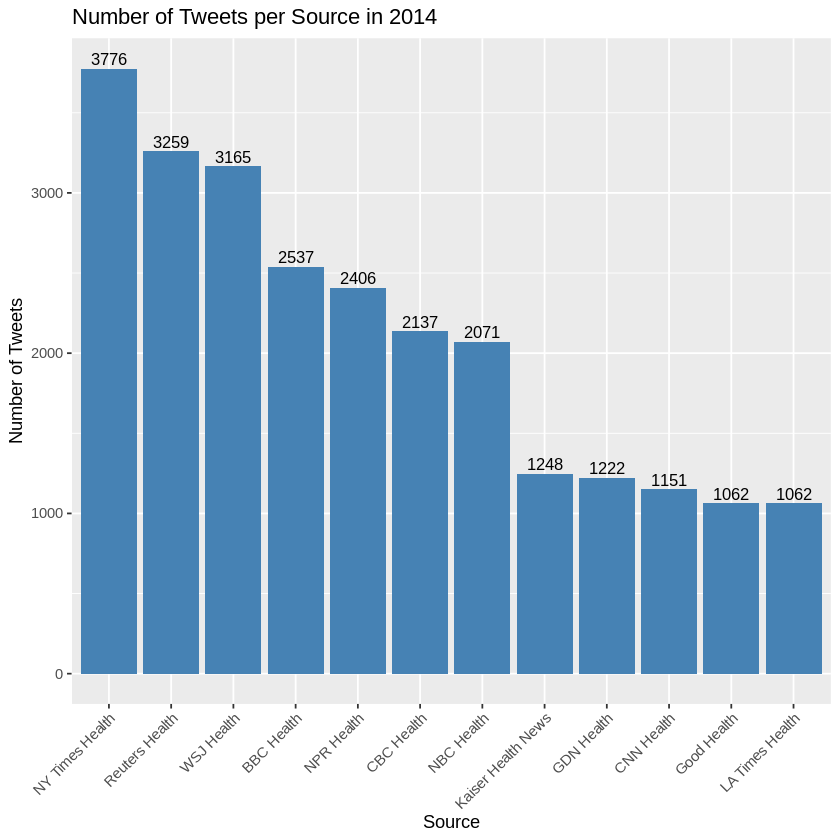

In [27]:
source_tweet_counts <- data_2014 %>%
  group_by(Source) %>%
  summarise(Tweet_Count = n(), .groups = 'drop') %>%
  arrange(desc(Tweet_Count))

plot <- ggplot(source_tweet_counts, aes(x = reorder(Source, -Tweet_Count), y = Tweet_Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = Tweet_Count), vjust = -0.3, color = "black", size = 3.5) +
  labs(title = "Number of Tweets per Source in 2014", x = "Source", y = "Number of Tweets") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(plot)

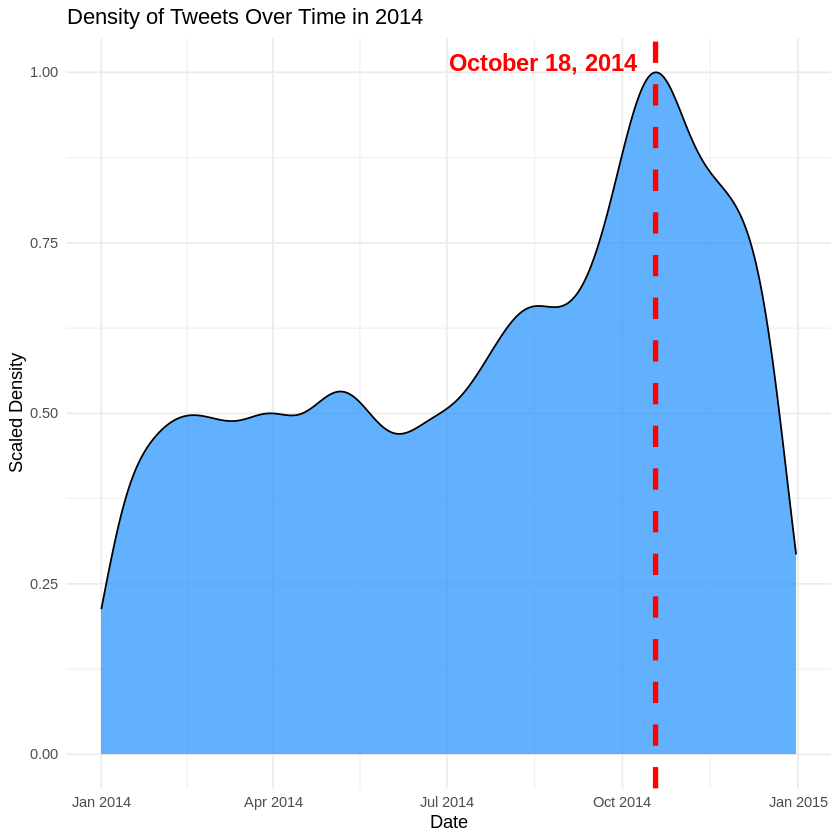

In [28]:
data_2014$Date <- as.Date(data_2014$Date)
data_2014$Date_numeric <- as.numeric(data_2014$Date - min(data_2014$Date, na.rm = TRUE))

dens <- density(data_2014$Date_numeric)
max_density_date_numeric <- dens$x[which.max(dens$y)]
max_density_value <- max(dens$y)
max_density_date <- min(data_2014$Date, na.rm = TRUE) + max_density_date_numeric

plot <- ggplot(data_2014, aes(x = Date)) +
  geom_density(aes(y = after_stat(scaled)), fill = "dodgerblue", alpha = 0.7) +
  geom_vline(xintercept = max_density_date, color = "red", linetype = "dashed", size = 1.5) +
  labs(title = "Density of Tweets Over Time in 2014", x = "Date", y = "Scaled Density") +
  theme_minimal() +
  annotate("text", x = max_density_date, y = 1.05 * max_density_value,
           label = format(max_density_date, "%B %d, %Y"),
           vjust = -40, hjust = 1.1, color = "red", fontface = "bold", size = 5, angle = 0)

print(plot)


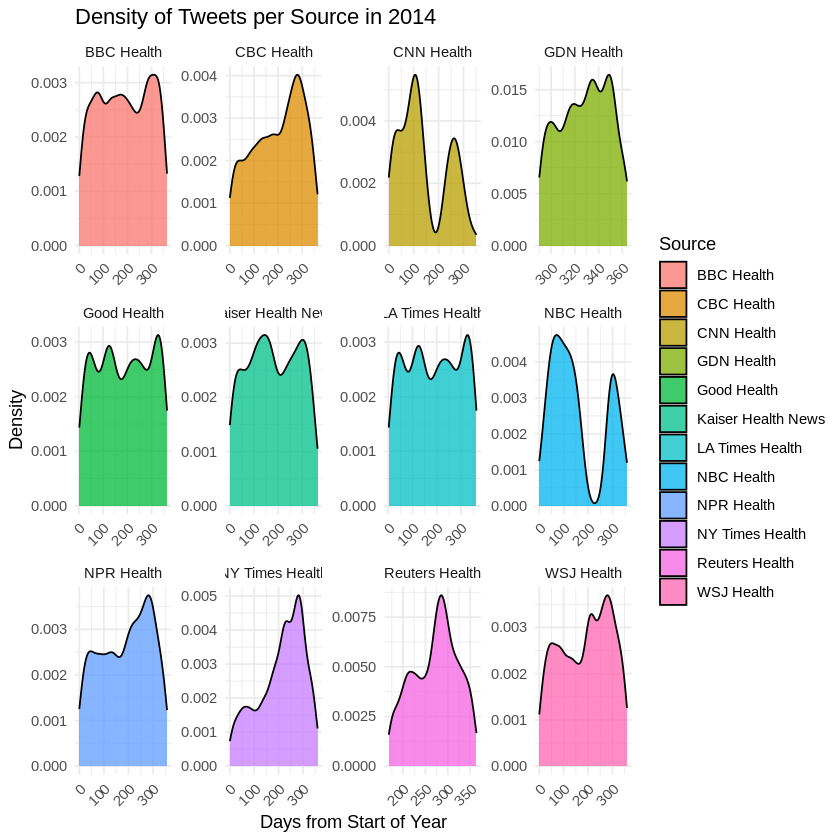

In [29]:
data_2014$Date_numeric <- as.numeric(data_2014$Date - min(data_2014$Date, na.rm = TRUE))

plot <- ggplot(data_2014, aes(x = Date_numeric)) +
  geom_density(aes(fill = Source), alpha = 0.75) +
  facet_wrap(~ Source, scales = "free") +
  labs(title = "Density of Tweets per Source in 2014", x = "Days from Start of Year", y = "Density") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(plot)

Picking joint bandwidth of 18.3



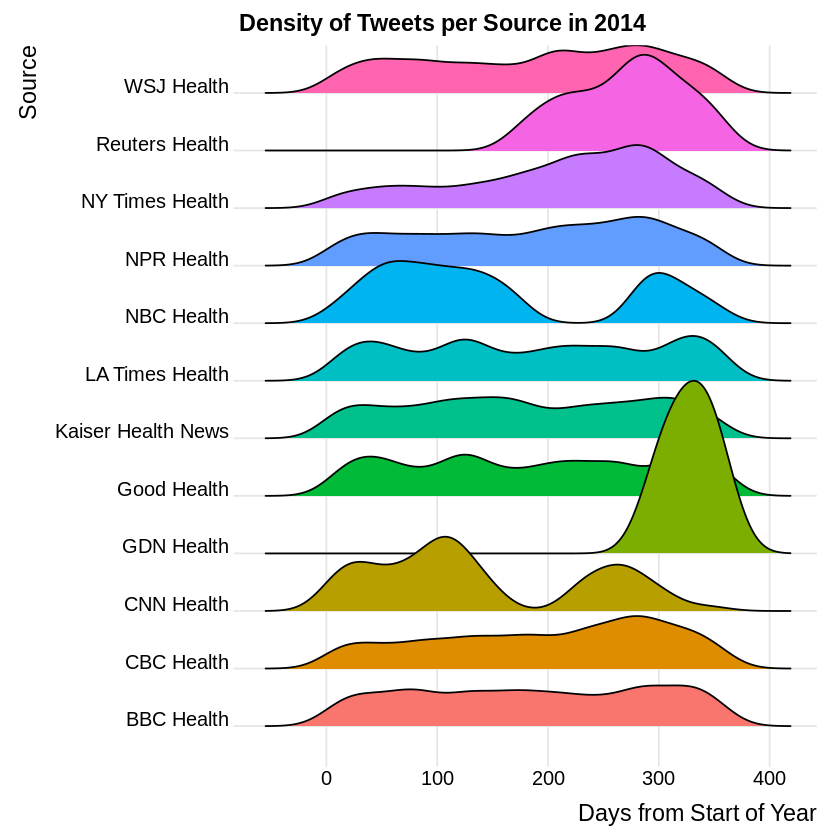

In [30]:
ggplot(data_2014, aes(x = Date_numeric, y = Source, fill = Source)) +
  geom_density_ridges(scale = 3) +
  labs(title = "Density of Tweets per Source in 2014",
       x = "Days from Start of Year",
       y = "Source") +
  theme_ridges() +
  theme(legend.position = "none")

## **2. Preprocessing**

In [31]:
clean_text <- function(text) {
  text <- gsub("s", "", text)
  text <- gsub("\\bRT\\b", "", text)
  text <- gsub("@\\w+", "", text)
  text <- gsub("https?://\\S+\\s?", "", text)
  text <- rm_twitter_url(text)
  text <- gsub("[^A-Za-z]", " ", text)
  text <- tolower(text)
  text <- removeWords(text, stopwords("english"))
  text <- gsub("\\b\\w{1}\\b", "", text)
  text <- stripWhitespace(text)
  return(text)
}

data_2014 <- data_2014 %>%
  mutate(processed_content = clean_text(Content))

In [32]:
preprocessed <- data_2014 %>% select(Content, processed_content)

In [33]:
write.csv(data_2014, "data_2014.csv", row.names = FALSE, sep = ",", quote = TRUE)

In [34]:
head(preprocessed)

Content,processed_content
<chr>,<chr>
"RT @cspanwj: VIDEO: @jrovner, @KHNews Senior Correspondent, on #Medicare and the #ACA http://cs.pn/1B1PCuh http://pbs.twimg.com/media/B6HQ67nCAAAp57I.jpg",video senior correspondent medicare aca
"How A States Choice On Medicaid Expansion Affects Hospitals, @SarahVarney4 reports in @NewsHour: http://khne.ws/1A57NOj",state choice medicaid expansion affects hospitals reports
Some doctors who treat #Medicaid patients are going to get a big pay cut. How will it affect patients? http://khne.ws/1wD8dvD,doctors treat medicaid patients going get big pay cut will affect patients
Ebola Doctor Makes Tough Choice To Save The Lives Of Two Colleagues http://khne.ws/1zhSfnF,ebola doctor makes tough choice save lives two colleagues
DETAILS: FDA Proposes Easing Lifetime Ban On Blood Donations By Gay Men http://khne.ws/1GXjlGL,details fda proposes easing lifetime ban blood donations gay men
"Millions Have Already Enrolled In 2015 Health Policies, Deadline Still 7 Weeks Off, @jrovner reports: http://khne.ws/1AXR3Is",millions already enrolled health policies deadline still weeks reports


In [35]:
words_data <- data_2014 %>%
  select(processed_content) %>%
  unnest_tokens(word, processed_content)

word_counts <- words_data %>%
  count(word, sort = TRUE)

head(word_counts)

word,n
<chr>,<int>
ebola,3964
health,2486
new,1689
says,1137
may,972
can,965


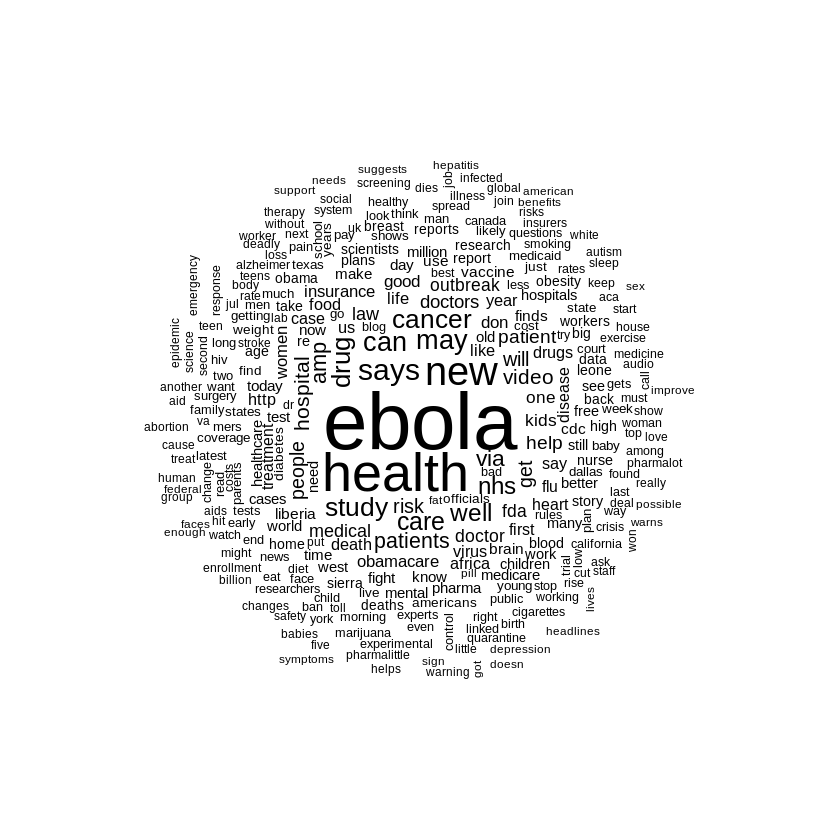

In [36]:
wordcloud(word_counts$word, word_counts$n, max.words = 300, random.order = FALSE)

In [37]:
words_data <- data_2014 %>%
  select(processed_content, Source) %>%
  unnest_tokens(word, processed_content)

word_counts_by_source <- words_data %>%
  count(Source, word, sort = TRUE)

head(word_counts_by_source)

Source,word,n
<chr>,<chr>,<int>
Reuters Health,ebola,1221
NY Times Health,well,719
NY Times Health,ebola,682
GDN Health,nhs,586
WSJ Health,health,518
BBC Health,video,511


# **III. Modelling**

## **1. Topic Extraction**

### **a. LDA**

In [38]:
str(data_2014)

tibble [25,096 × 7] (S3: tbl_df/tbl/data.frame)
 $ ID               : num [1:25096] 5.50e+17 5.50e+17 5.48e+17 5.48e+17 5.48e+17 ...
 $ Source           : chr [1:25096] "Kaiser Health News" "Kaiser Health News" "Kaiser Health News" "Kaiser Health News" ...
 $ Date             : Date[1:25096], format: "2014-12-30" "2014-12-29" ...
 $ Content          : chr [1:25096] "RT @cspanwj: VIDEO: @jrovner, @KHNews Senior Correspondent, on #Medicare and the #ACA http://cs.pn/1B1PCuh http"| __truncated__ "How A State\u0092s Choice On Medicaid Expansion Affects Hospitals, @SarahVarney4 reports in @NewsHour: http://khne.ws/1A57NOj" "Some doctors who treat #Medicaid patients are going to get a big pay cut. How will it affect patients? http://khne.ws/1wD8dvD" "Ebola Doctor Makes Tough Choice To Save The Lives Of Two Colleagues http://khne.ws/1zhSfnF" ...
 $ Year             : num [1:25096] 2014 2014 2014 2014 2014 ...
 $ Date_numeric     : num [1:25096] 363 362 357 357 357 356 356 356 355 352 ...
 $ pr

In [39]:
corpus <- VCorpus(VectorSource(data_2014$processed_content))

In [40]:
dtm <- DocumentTermMatrix(corpus, control = list(weighting = weightTfIdf))

In [41]:
dtm_matrix <- sparseMatrix(i = dtm$i, j = dtm$j, x = dtm$v,
                           dims = dim(dtm),
                           dimnames = list(rownames(dtm), colnames(dtm)))

tokens <- colnames(dtm_matrix)

In [42]:
vocab <- create_vocabulary(tokens)
vectorizer <- vocab_vectorizer(vocab)

In [43]:
tdm <- t(dtm_matrix)
tcm <- tdm %*% dtm_matrix

For 10 Topics and their respetive top 10 terms:

In [44]:
num_topics <- 10
lda_model <- LDA$new(n_topics = num_topics, doc_topic_prior = 0.1, topic_word_prior = 0.01)
doc_topic_distr <- lda_model$fit_transform(tcm, n_iter = 1000, convergence_tol = 0.01, n_check_convergence = 25)
topic_terms <- lda_model$get_top_words(n = 10, topic_number = 1:num_topics)
topic_terms_df <- data.frame(topic_terms)

print(topic_terms_df)

INFO  [21:27:20.538] early stopping at 75 iteration
INFO  [21:27:28.501] early stopping at 50 iteration
          X1         X2    X3       X4         X5     X6        X7        X8
1     health cigarettes  well     know        nhs cancer     video     video
2  obamacare       food  good   doctor     health  study      help    weight
3  insurance      audio   amp     life healthcare   drug marijuana     water
4        law    smoking   can   things    doctors   risk       can       fat
5       care    tobacco   age     well       free    may      live  bacteria
6      court       well   old medicine       care  drugs   surgery      lose
7   coverage      brain   new  parents       drug  heart      baby       run
8   abortion    smokers   day   living   medicare  blood   alcohol       way
9        new      risks today   likely       data  women cigarette challenge
10     plans    warning   eat     take        fda breast christmas       ill
         X9      X10
1     ebola    ebola
2  outb

### **b. Jaccard Similarity**

In [45]:
run_lda <- function(tcm, num_topics = 10, n_top_words = 10) {
  lda_model <- LDA$new(n_topics = num_topics, doc_topic_prior = 0.1, topic_word_prior = 0.01)
  lda_model$fit_transform(tcm, n_iter = 1000, convergence_tol = 0.01, n_check_convergence = 25)
  top_terms <- lda_model$get_top_words(n = n_top_words)
  return(top_terms)
}

In [46]:
n_runs <- 5
topics_list <- vector("list", n_runs)

for (i in seq_len(n_runs)) {
  topics_list[[i]] <- run_lda(tcm)
}

INFO  [21:27:42.530] early stopping at 75 iteration
INFO  [21:27:49.871] early stopping at 50 iteration
INFO  [21:28:03.286] early stopping at 75 iteration
INFO  [21:28:10.711] early stopping at 50 iteration
INFO  [21:28:23.906] early stopping at 75 iteration
INFO  [21:28:32.023] early stopping at 50 iteration
INFO  [21:28:45.831] early stopping at 75 iteration
INFO  [21:28:53.460] early stopping at 50 iteration
INFO  [21:29:06.732] early stopping at 75 iteration
INFO  [21:29:13.903] early stopping at 50 iteration


In [47]:
jaccard_index <- function(set1, set2) {
  intersection <- length(intersect(set1, set2))
  union <- length(union(set1, set2))
  return(intersection / union)
}

In [48]:
calculate_jaccard <- function(topics_list) {
  n_topics <- length(topics_list[[1]])
  jaccard_matrix <- matrix(0, nrow = n_topics, ncol = n_topics)
  for (i in 1:n_topics) {
    for (j in 1:n_topics) {
      if (i != j) {
        jaccard_matrix[i, j] <- jaccard_index(topics_list[[1]][[i]], topics_list[[2]][[j]])
      }
    }
  }
  return(jaccard_matrix)
}

In [49]:
jaccard_similarity <- calculate_jaccard(topics_list)
print(jaccard_similarity)

       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [2,]    1    0    0    0    0    0    0    0    0     0     0     0     0
  [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [11,]    0    1    0    0    0    0    0    0    0     0     0     1     0
 [12,]    0    0    0    0    0    0    0    0    0     0     1     0     0
 [13,]    0 

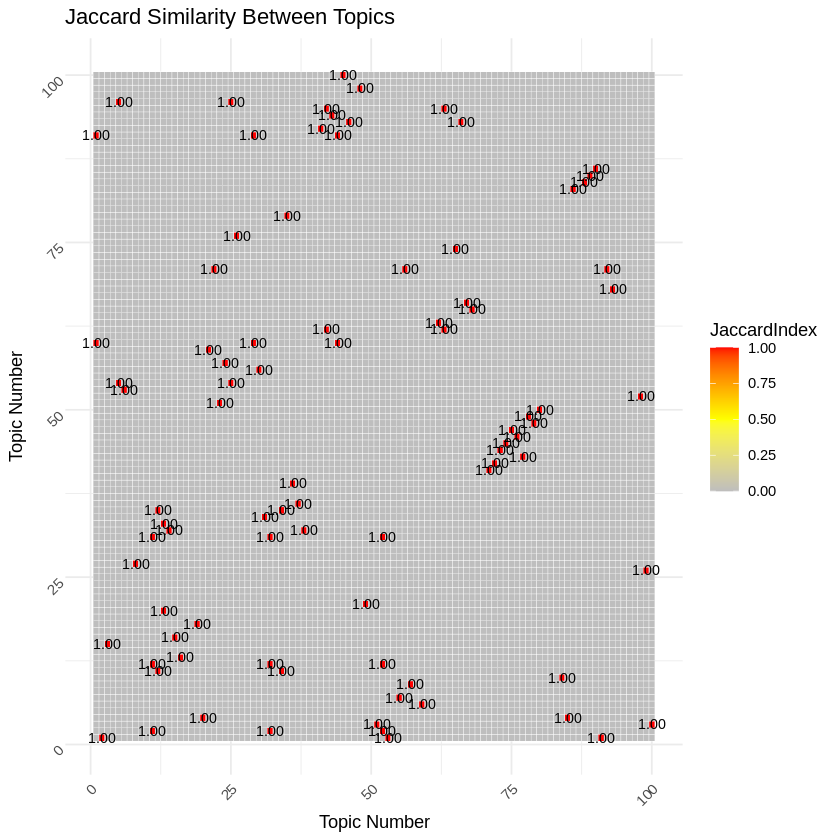

In [50]:
jaccard_df <- reshape2::melt(as.matrix(jaccard_similarity))
colnames(jaccard_df) <- c("Topic1", "Topic2", "JaccardIndex")

heatmap_plot <- ggplot(jaccard_df, aes(x = Topic1, y = Topic2, fill = JaccardIndex)) +
  geom_tile(color = "white") +
  scale_fill_gradientn(colors = c("grey", "yellow", "red"), values = scales::rescale(c(0, 0.5, 1))) +
  geom_text(aes(label = ifelse(JaccardIndex > 0.5, sprintf("%.2f", JaccardIndex), "")), size = 3, color = "black") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        axis.text.y = element_text(angle = 45, hjust = 1, vjust = 1)) +
  ggtitle("Jaccard Similarity Between Topics") +
  xlab("Topic Number") +
  ylab("Topic Number")


print(heatmap_plot)

### **c. Coherence Similarity**

In [51]:
run_lda_and_coherence <- function(tcm, dtm_matrix, num_topics, n_top_words = 10) {
  lda_model <- LDA$new(n_topics = num_topics, doc_topic_prior = 0.1, topic_word_prior = 0.01)
  lda_model$fit_transform(tcm, n_iter = 1000, convergence_tol = 0.01, n_check_convergence = 25)

  top_terms <- lda_model$get_top_words(n = n_top_words)
  top_terms_matrix <- sapply(top_terms, function(terms) terms)

  phi <- matrix(0, nrow = length(top_terms), ncol = ncol(dtm_matrix))
  colnames(phi) <- colnames(dtm_matrix)
  rownames(phi) <- paste("Topic", 1:length(top_terms))

  for (i in seq_along(top_terms)) {
    phi[i, top_terms[[i]]] <- 1
  }
  coherence <- CalcProbCoherence(phi = phi, dtm = dtm_matrix, M = n_top_words)
  return(mean(coherence))
}


In [52]:
topic_range <- seq(2, 20, by = 2)
coherence_scores <- sapply(topic_range, function(k) run_lda_and_coherence(tcm, dtm_matrix, k))

INFO  [21:29:23.240] early stopping at 50 iteration
INFO  [21:29:29.242] early stopping at 50 iteration
INFO  [21:29:38.624] early stopping at 50 iteration
INFO  [21:29:45.909] early stopping at 50 iteration
INFO  [21:29:58.968] early stopping at 75 iteration
INFO  [21:30:07.842] early stopping at 50 iteration
INFO  [21:30:23.584] early stopping at 75 iteration
INFO  [21:30:30.621] early stopping at 50 iteration
INFO  [21:30:44.727] early stopping at 75 iteration
INFO  [21:30:52.680] early stopping at 50 iteration
INFO  [21:31:07.653] early stopping at 75 iteration
INFO  [21:31:15.600] early stopping at 50 iteration
INFO  [21:31:30.218] early stopping at 75 iteration
INFO  [21:31:38.065] early stopping at 50 iteration
INFO  [21:31:52.987] early stopping at 75 iteration
INFO  [21:32:00.689] early stopping at 50 iteration
INFO  [21:32:20.364] early stopping at 100 iteration
INFO  [21:32:28.377] early stopping at 50 iteration
INFO  [21:32:47.832] early stopping at 100 iteration
INFO  [21:

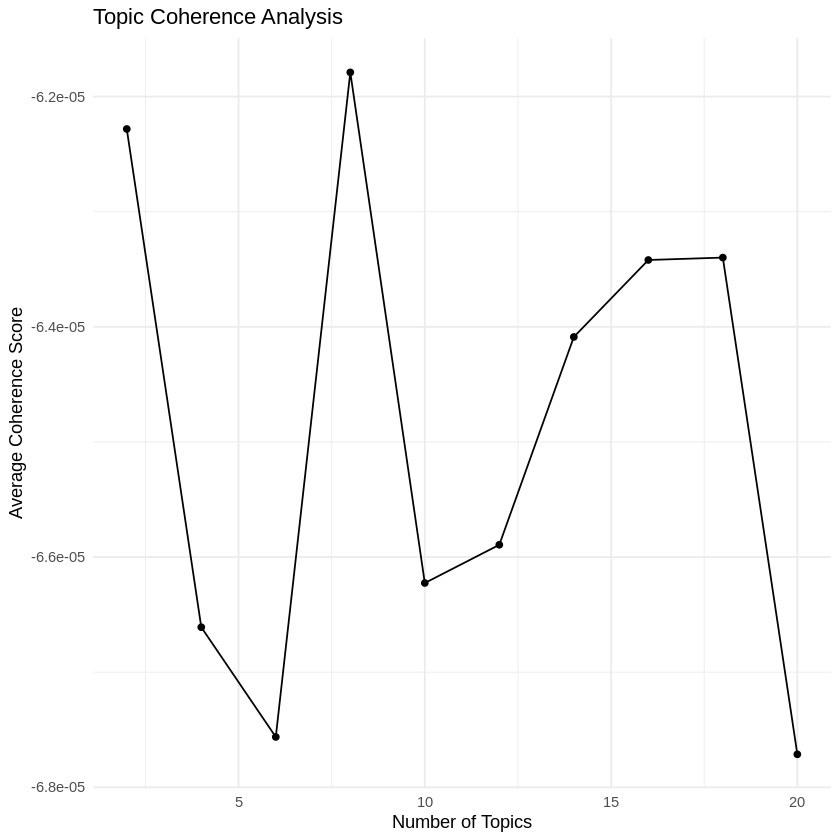

In [53]:
coherence_data <- data.frame(Topics = topic_range, Coherence = coherence_scores)

ggplot(coherence_data, aes(x = Topics, y = Coherence)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  ggtitle("Topic Coherence Analysis") +
  xlab("Number of Topics") +
  ylab("Average Coherence Score")

## **2. Association Rule Mining**

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.01      1      5 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 250 

create itemset ... 
set transactions ...[17171 item(s), 25096 transaction(s)] done [0.19s].
sorting and recoding items ... [83 item(s)] done [0.00s].
creating sparse bit matrix ... [83 row(s), 25096 column(s)] done [0.00s].
writing  ... [110 set(s)] done [0.02s].
Creating S4 object  ... done [0.00s].
Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE
    lhs      rhs      support    confidence lift     itemset
[1] {law} => {health} 0.01406599 0.7861915  8.272647 3      


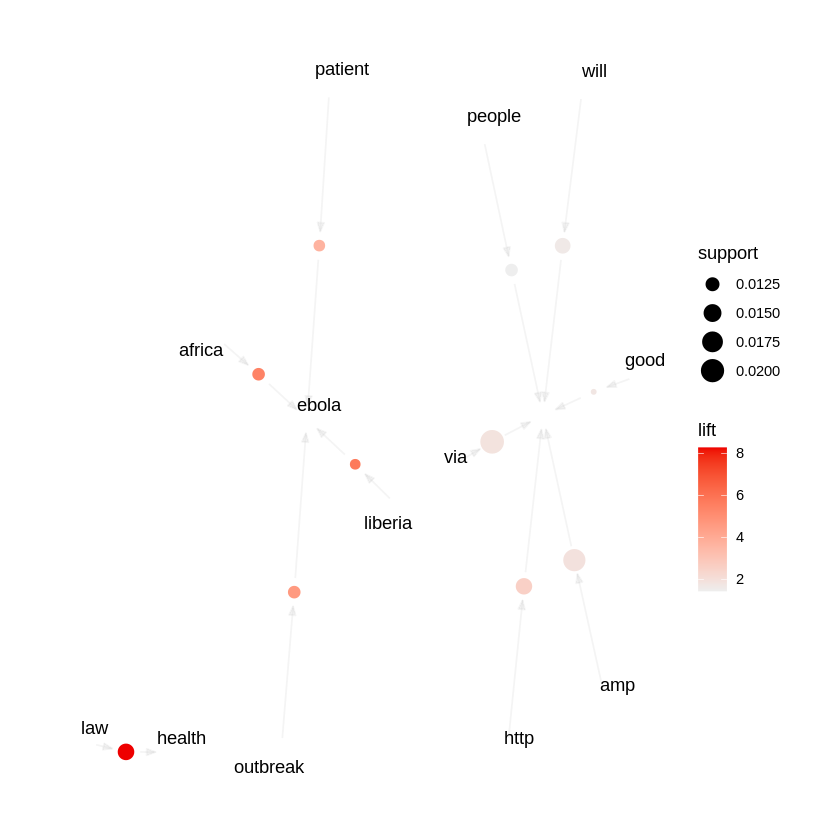

In [54]:
tweets_list <- strsplit(as.character(data_2014$processed_content), " ")
trans <- as(tweets_list, "transactions")

frequent_itemsets <- eclat(trans, parameter = list(supp = 0.01, maxlen = 5))

rules <- ruleInduction(frequent_itemsets, trans, confidence = 0.5, control = list(verbose = TRUE))

interest_measures <- interestMeasure(rules, trans, measure=c("lift", "leverage"))

plot(rules, method = "graph", control = list(type = "items"))

high_lift_rules <- subset(rules, lift > 6)
inspect(high_lift_rules)

In [55]:
high_lift_rules <- subset(rules, lift > 6)
inspect(high_lift_rules)

    lhs      rhs      support    confidence lift     itemset
[1] {law} => {health} 0.01406599 0.7861915  8.272647 3      
